# Example 11-9: Using built-in ODE solvers

By now, you should have a good sense of Runge-Kutta methods and the different orders of algorithms for solving ODEs.
While it is instructive to implement RK methods from scratch, in the real world it is more practical to use a pre-built ODE solver, as those tend to be more robust and efficient.
In MATLAB, [`ode45()`](https://www.mathworks.com/help/matlab/ref/ode45.html) is the go-to function, one of those "classic" MATLAB commands.
In Python, there are several alternatives, and we'll go with [`solve_ivp()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) as a solid choice.

## Summary of commands

[SciPy](https://docs.scipy.org/doc/scipy/index.html): A specialized library for math and science.
- [`scipy.integrate.solve_ivp(func, tspan, y0, ...)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) - Solve initial value problems using Runge-Kutta methods.
  - `func`: The function handle for the ODE that you want to solve
  - `tspan`: The start and end times for the solution.
             The function will automatically choose an appropriate discretization.
  - `y0`: The initial value

Those are the most important parameters, but if you look in the documentation, there are a few others that you may want to consider:
- `method`: The default is `RK45`, which is essentially MATLAB's `ode45()`.
- `max_step`: Maximum allowed step size. You may have to set this to get more granular results.
- `args`: If your `func` has extra parameters (e.g., coefficients, constants), then put them here.

The returned result is interesting: It is a collection of different objects which can be accessed as individual fields. 
That is, to extract the time and solution, one might do:

```python
solver = solve_ivp(...)      # solver has many fields
t, y = solver.t, solver.y    # we only grab the ones we need
```

## Solving the flame model using `solve_ivp()`

Recall the flame model ODE presented previously in class:

$$ r'(t) = \alpha \left[ r^2 (t) - r^3 (t) \right]; \quad \alpha = 100; \quad r(0) = 10^{-2}; \quad 0 \le t \le 2 $$

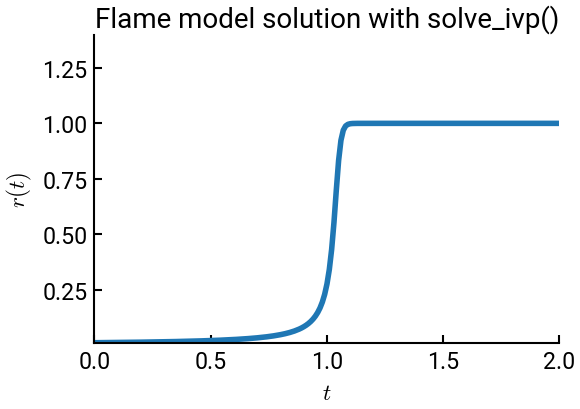

In [4]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp   # note how this is done!

# flame model ODE
def myODE(t, y, alpha):
    return alpha * (y ** 2 - y ** 3)

# constants
t0 = 0
tf = 2
r0 = 1e-2
alpha = 100

# call solve_ivp() - max_step argument is key!
solver = solve_ivp(myODE, [t0, tf], [r0], args=(alpha,), max_step=0.01)
t, y = solver.t, solver.y

# plot results
fig, ax = plt.subplots()
ax.plot(t, y[0])
ax.set(xlabel='$t$', ylabel='$r(t)$', title="Flame model solution with solve_ivp()",
       xlim=[0, 2], ylim=[r0, 1.4])
plt.show()

```{note}
What happens if you delete the `max_step` argument of `solve_ivp()`?
```